In [3]:
"""
@author: maximefontana
"""
# System
import sys

# Graph Data
import snap
import networkx as nx

# Scientific Computing 
import numpy as np
import scipy
import pandas as pd

# Math
import random as ran
from time import time

# Custom imports
%run 'Algorithms.ipynb'
%run 'ClusteringEvaluation.ipynb'
%run 'PlotFunctions.ipynb'
%run 'GroundTruthGen.ipynb'

# Specific models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics

# Plotting
from matplotlib import pyplot as plt

In [2]:
#pip install networkx==2.5

Note: you may need to restart the kernel to use updated packages.


In [4]:
def generate_variant_sbm_55(size, a, b , c, d, i):
    arr = [size // 25] * 25
    probs = [[a,b,b,b,b ,c,d,d,d,d ,c,d,d,d,d, c,d,d,d,d ,c,d,d,d,d],
             [b,a,b,b,b ,d,c,d,d,d ,d,c,d,d,d, d,c,d,d,d ,d,c,d,d,d],
             [b,b,a,b,b ,d,d,c,d,d ,d,d,c,d,d, d,d,c,d,d ,d,d,c,d,d],
             [b,b,b,a,b ,d,d,d,c,d ,d,d,d,c,d, d,d,d,c,d ,d,d,d,c,d],
             [b,b,b,b,a ,d,d,d,d,c ,d,d,d,d,c, d,d,d,d,c ,d,d,d,d,c],
             
             [c,d,d,d,d ,a,b,b,b,b ,c,d,d,d,d, c,d,d,d,d ,c,d,d,d,d],
             [d,c,d,d,d ,b,a,b,b,b ,d,c,d,d,d, d,c,d,d,d ,d,c,d,d,d],
             [d,d,c,d,d ,b,b,a,b,b ,d,d,c,d,d, d,d,c,d,d ,d,d,c,d,d],
             [d,d,d,c,d ,b,b,b,a,b ,d,d,d,c,d, d,d,d,c,d ,d,d,d,c,d],
             [d,d,d,d,c ,b,b,b,b,a ,d,d,d,d,c, d,d,d,d,c ,d,d,d,d,c],
             
             [c,d,d,d,d ,c,d,d,d,d ,a,b,b,b,b, c,d,d,d,d ,c,d,d,d,d],
             [d,c,d,d,d ,d,c,d,d,d ,b,a,b,b,b, d,c,d,d,d ,d,c,d,d,d],
             [d,d,c,d,d ,d,d,c,d,d ,b,b,a,b,b, d,d,c,d,d ,d,d,c,d,d],
             [d,d,d,c,d ,d,d,d,c,d ,b,b,b,a,b, d,d,d,c,d ,d,d,d,c,d],
             [d,d,d,d,c ,d,d,d,d,c ,b,b,b,b,a, d,d,d,d,c ,d,d,d,d,c],
             
             [c,d,d,d,d ,c,d,d,d,d ,c,d,d,d,d, a,b,b,b,b ,c,d,d,d,d],
             [d,c,d,d,d ,d,c,d,d,d ,d,c,d,d,d, b,a,b,b,b ,d,c,d,d,d],
             [d,d,c,d,d ,d,d,c,d,d ,d,d,c,d,d, b,b,a,b,b ,d,d,c,d,d],
             [d,d,d,c,d ,d,d,d,c,d ,d,d,d,c,d, b,b,b,a,b ,d,d,d,c,d],
             [d,d,d,d,c ,d,d,d,d,c ,d,d,d,d,c, b,b,b,b,a ,d,d,d,d,c],
             
             [c,d,d,d,d ,c,d,d,d,d ,c,d,d,d,d, c,d,d,d,d ,a,b,b,b,b],
             [d,c,d,d,d ,d,c,d,d,d ,d,c,d,d,d, d,c,d,d,d ,b,a,b,b,b],
             [d,d,c,d,d ,d,d,c,d,d ,d,d,c,d,d, d,d,c,d,d ,b,b,a,b,b],
             [d,d,d,c,d ,d,d,d,c,d ,d,d,d,c,d, d,d,d,c,d ,b,b,b,a,b],
             [d,d,d,d,c ,d,d,d,d,c ,d,d,d,d,c, d,d,d,d,c ,b,b,b,b,a]]
    
    # Generate SBM
    graph = nx.stochastic_block_model(arr, probs, seed=i)
    
    # Run Algorithms
    t0 = time() # Start 
    labels = un_spectral(graph, 5)
    t1 = time() # Run Time Algo 1
    fair_labels = un_spectral_fair(graph, 5, labels)
    t2 = time() # Run Time Algo 2
    
    # Get the Error
    y = round(error_sym(labels, fair_labels), 2)
        
    return y, (t1-t0), (t2-t1)

def get_averaged_results(num_runs, error_list, USC_list, FairUSC_list):
    
    reshaped_errors = error_list.reshape(num_runs,10)
    averaged_errors = reshaped_errors.mean(axis=0)
    
    reshaped_USC = USC_list.reshape(num_runs, 10)
    averaged_USC = reshaped_USC.mean(axis=0)
    
    reshaped_FairUSC = FairUSC_list.reshape(num_runs, 10)
    averaged_FairUSC = reshaped_FairUSC.mean(axis=0)
    
    return averaged_errors, averaged_USC, averaged_FairUSC

def get_averaged_tests_55(num_runs):
    """
    PARAMETERS
    -------------------------
    INPUT 
    - num_runs : Number of runs you want to make in order to average out the results
    
    OUTPUT
    - error_scores : 1D-array of size 10, representing averaged results up on 
    - USC_scores : 2D-array of size m*10, storing the running time of algo.1 
    - FairUSC_scores : 2D-array of size m*10, storing the running time of algo.2
    """
    
    error_scores = np.array([])
    USC_scores = np.array([])
    FairUSC_scores = np.array([])
    
    for i in range(num_runs):
        for y in range(1000, 11000, 1000):
            error, run1, run2 = generate_variant_sbm_55(y, 0.4, 0.3, 0.2, 0.1, i)
            
            error_scores = np.append(error_scores, [error])
            USC_scores = np.append(USC_scores, [run1])
            FairUSC_scores = np.append(FairUSC_scores, [run2])
            print("Run :", i+1 , ". Score :", error, ". For n = ", y, ". USC :", round(run1,2) 
                  , ". FairUSC :", round(run2,2))
            
    av_error, av_USC, av_FairUSC = get_averaged_results(num_runs, error_scores, 
                                   USC_scores, FairUSC_scores)
    
    
    return av_error, av_USC, av_FairUSC


'\nerrors, algo1runs, algo2runs = get_averaged_tests_55(4) ### !!! This will take a few hours\n\nfig = plt.figure()\nx = np.arange(1000,11000,1000)\naxes_1 = fig.add_axes([0.1,0.1,0.9,0.9])\naxes_1.plot(x, errors, label="algo_2", marker=\'o\')\nplt.xlabel(\'n\')\nplt.ylabel(\'Error (in %)\')\naxes_1.legend(loc=0)\n'

In [7]:
# Test with : 0.2 0.15 0.10. 0.05
"""
errors, algo1runs, algo2runs = get_averaged_tests_55(4) ### !!! This will take a few hours

fig = plt.figure()
x = np.arange(1000,11000,1000)
axes_1 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_1.plot(x, errors, label="algo_2", marker='o')
plt.xlabel('n')
plt.ylabel('Error (in %)')
axes_1.legend(loc=0)
"""

print(errors)
print(algo1runs)
print(algo2runs)

[19.875  19.95   19.97   19.9725 16.075  10.21    0.275   0.04    0.
  0.    ]
[  0.54617465   2.93992597   9.60373455  22.13490546  43.46908695
  83.1985209  131.71047473 198.59189975 283.93881142 394.21269351]
[  0.20511776   1.10660887   3.28844804   7.00502759  13.86039871
  21.98830396  37.00142068  58.29770422  83.24058729 112.19232947]


<ipython-input-14-afe90eecae15>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes_2 = fig.add_axes([0.1,0.1,0.9,0.9])


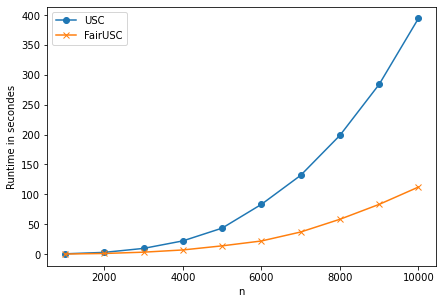

In [14]:
fig = plt.figure()
x = np.arange(1000,11000,1000)
axes_1 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_2 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_1.plot(x, algo1runs, label="USC", marker='o')
axes_2.plot(x, algo2runs, label="FairUSC", marker='x')
plt.xlabel('n')
plt.ylabel('Runtime in secondes')
axes_1.legend(loc=0)

Run : 1 . Score : 19.8 . For n =  1000 . USC : 0.65 . FairUSC : 0.35
Run : 1 . Score : 2.0 . For n =  2000 . USC : 3.28 . FairUSC : 1.41
Run : 1 . Score : 1.67 . For n =  3000 . USC : 10.88 . FairUSC : 4.34
Run : 1 . Score : 0.0 . For n =  4000 . USC : 23.65 . FairUSC : 9.37
Run : 1 . Score : 0.0 . For n =  5000 . USC : 46.94 . FairUSC : 15.57
Run : 1 . Score : 0.0 . For n =  6000 . USC : 91.2 . FairUSC : 31.14
Run : 1 . Score : 0.0 . For n =  7000 . USC : 143.51 . FairUSC : 45.53
Run : 1 . Score : 0.0 . For n =  8000 . USC : 216.04 . FairUSC : 73.17
Run : 1 . Score : 0.0 . For n =  9000 . USC : 306.22 . FairUSC : 99.47
Run : 1 . Score : 0.0 . For n =  10000 . USC : 412.17 . FairUSC : 142.13
Run : 2 . Score : 19.9 . For n =  1000 . USC : 0.6 . FairUSC : 0.29
Run : 2 . Score : 0.5 . For n =  2000 . USC : 3.57 . FairUSC : 1.54
Run : 2 . Score : 0.1 . For n =  3000 . USC : 11.69 . FairUSC : 4.3
Run : 2 . Score : 0.0 . For n =  4000 . USC : 25.23 . FairUSC : 8.71
Run : 2 . Score : 0.0 . Fo

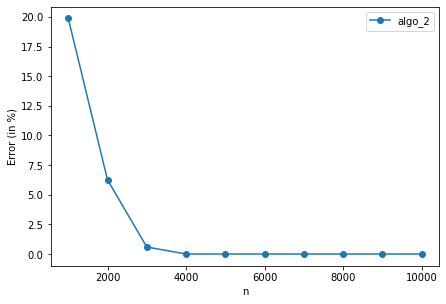

In [5]:
# Test with 0.4 0.3 0.2 0.1
errors, algo1runs, algo2runs = get_averaged_tests_55(4) ### !!! This will take a few hours

fig = plt.figure()
x = np.arange(1000,11000,1000)
axes_1 = fig.add_axes([0.1,0.1,0.9,0.9])
axes_1.plot(x, errors, label="algo_2", marker='o')
plt.xlabel('n')
plt.ylabel('Error (in %)')
axes_1.legend(loc=0)

In [6]:
print(errors)
print(algo1runs)
print(algo2runs)

[19.875   6.25    0.5925  0.      0.      0.      0.      0.      0.
  0.    ]
[  0.58995986   3.30364156  10.92558694  23.47071183  46.63591659
  89.80043435 139.43157214 214.88872522 297.81086904 408.16045183]
[  0.2893979    1.3918435    4.13657343   8.81946719  15.79343516
  27.71423519  44.47145754  67.57386178  93.29877573 129.60837495]
